In [133]:
#Loading important libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [194]:
#np.savez('data1.npz', X = datars, y = main_y)
loadfile = np.load("data1.npz")
datars = loadfile["X"]
y = loadfile["y"]
del loadfile

In [195]:
#Preparing main dataset
datars = datars.reshape(datars.shape[0], -1)

print(datars.shape)
print(y.shape)
main_dataset = np.concatenate((datars, y), axis = 1)
print(main_dataset.shape)

#Defining main x and y for training
main_x = main_dataset[:, :-1]
main_y = main_dataset[:, -1]
print(main_x.shape)
print(main_y.shape)

(1875, 21411)
(1875, 1)
(1875, 21412)
(1875, 21411)
(1875,)


In [196]:
# event_id = {
#     "taskstart" : '9',
#     "cue" : "1",
#     "go" : "2",
#     "button press" : "5",
#     "no-go" : "4",
#     "task end": "10",
#     "error 1" : "3",
#     "error 2" : "6",
#     "error 3" : "7",
#     "error 4" : "8",
#     "error 5" : "11"
# }
# event_id

In [197]:
#Removing events which are not needed for current task
required_events = [1, 2, 4, 5]    #Events to classify

dataset = main_dataset[np.array(list(r[-1] in required_events for r in main_dataset))]

print(dataset.shape)

#Defining x and y
x = dataset[:, :-1]
y = dataset[:, -1]
print(x.shape)
print(y.shape)
print(list(set(y)))

permutations = np.random.permutation(len(x))
# print(permutation)
print(x[-1])
x = x[permutations]
y = y[permutations]
print(x[-1])

(1797, 21412)
(1797, 21411)
(1797,)
[1.0, 2.0, 4.0, 5.0]
[-3.20648044e-06 -2.80111604e-06 -3.31334102e-06 ...  2.44812170e-06
  2.47693195e-06  2.83886060e-06]
[ 6.60205261e-06  6.09627055e-06 -4.69704084e-06 ...  1.47611743e-05
  1.50463891e-05  1.53258545e-05]


In [198]:
#Encoding y
dict = {}
for i in range(len(required_events)):
    dict[required_events[i]] = i
    
for i in range(len(y)):
    y[i] = dict[y[i]]

print(list(set(y)))

[0.0, 1.0, 2.0, 3.0]


### Other Models

In [199]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [200]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Logistic Regression

In [201]:
from sklearn.linear_model import LogisticRegression
Logclassifier = LogisticRegression(random_state = 0, max_iter = 1000)
Logclassifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [202]:
y_pred_log = Logclassifier.predict(X_test)

In [203]:
from sklearn.metrics import confusion_matrix
cm_log = confusion_matrix(y_test, y_pred_log)
print(cm_log)

[[99 21  9  7]
 [32 63  8  4]
 [ 6 11  4  2]
 [ 5  5  5 79]]


In [204]:
accuracies_log = cross_val_score(estimator = Logclassifier, X = X_train, y = y_train, cv = 10)
accuracy_log = accuracies_log.mean()*100
print("Accuracy: {:.2f} %".format(accuracy_log))
print("Standard Deviation: {:.2f} %".format(accuracies_log.std()*100))

Accuracy: 63.74 %
Standard Deviation: 4.62 %


#### Kernal SVM

In [205]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel = 'rbf', random_state = 0)
SVCclassifier.fit(X_train, y_train)

SVC(random_state=0)

In [206]:
y_pred_SVC = SVCclassifier.predict(X_test)

In [207]:
cm_SVC = confusion_matrix(y_test, y_pred_SVC)
print(cm_log)
accuracy_SVC = accuracy_score(y_test, y_pred_SVC)
accuracy_SVC

[[99 21  9  7]
 [32 63  8  4]
 [ 6 11  4  2]
 [ 5  5  5 79]]


0.6055555555555555

#### Random Forest

In [208]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RFclassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [209]:
y_pred_RF = RFclassifier.predict(X_test)

In [210]:
cm_RF = confusion_matrix(y_test, y_pred_RF)
print(cm_RF)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
accuracy_RF

[[85 29  1 21]
 [52 42  0 13]
 [ 9 13  1  0]
 [36 11  1 46]]


0.48333333333333334

#### KNN

In [211]:
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNNclassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [212]:
y_pred_KNN = KNNclassifier.predict(X_test)

In [213]:
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
print(cm_KNN)
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
accuracy_KNN

[[89 31  1 15]
 [45 44  1 17]
 [13  7  0  3]
 [39  8  0 47]]


0.5

#### Naive Bayes

In [214]:
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, y_train)

GaussianNB()

In [215]:
y_pred_NB = NBclassifier.predict(X_test)

In [216]:
cm_NB = confusion_matrix(y_test, y_pred_NB)
print(cm_NB)
accuracy_NB = accuracy_score(y_test, y_pred_NB)
accuracy_NB

[[55 35  9 37]
 [28 51 10 18]
 [ 6  8  5  4]
 [14 14  5 61]]


0.4777777777777778

In [217]:
from sklearn.metrics import roc_curve, auc

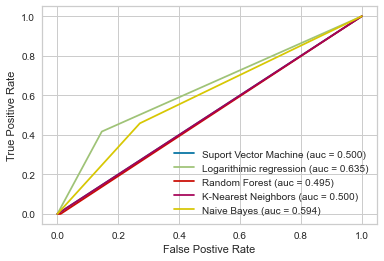

In [160]:
log_fpr, log_tpr, threshold = roc_curve(y_test, y_pred_log)
auc_log = auc(log_fpr, log_tpr)
SVC_fpr, SVC_tpr, threshold = roc_curve(y_test, y_pred_SVC)
auc_SVC = auc(SVC_fpr, SVC_tpr)
RF_fpr, RF_tpr, threshold = roc_curve(y_test, y_pred_RF)
auc_RF = auc(RF_fpr, RF_tpr)
KNN_fpr, KNN_tpr, threshold = roc_curve(y_test, y_pred_KNN)
auc_KNN = auc(KNN_fpr, KNN_tpr)
NB_fpr, NB_tpr, threshold = roc_curve(y_test, y_pred_NB)
auc_NB = auc(NB_fpr, NB_tpr)

fig = plt.figure()
plt.plot(SVC_fpr, SVC_tpr, linestyle = '-', label = "Suport Vector Machine (auc = %0.3f)"%auc_SVC)
plt.plot(log_fpr, log_tpr, linestyle = '-', label = "Logarithimic regression (auc = %0.3f)"%auc_log)
plt.plot(RF_fpr, RF_tpr, linestyle = '-', label = "Random Forest (auc = %0.3f)"%auc_RF)
plt.plot(KNN_fpr, KNN_tpr, linestyle = '-', label = "K-Nearest Neighbors (auc = %0.3f)"%auc_KNN)
plt.plot(NB_fpr, NB_tpr, linestyle = '-', label = "Naive Bayes (auc = %0.3f)"%auc_NB)

plt.xlabel("False Postive Rate")
plt.ylabel("True Positive Rate")

plt.legend()
plt.show()

## Logging in neptune

In [218]:
#Starting a session
import neptune.new as neptune
import neptune.new.integrations.sklearn as npt_utils

run = neptune.init(
    project="sahilm75/EEG-pipeline",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJmY2QzOGU2NC1iZTJiLTQ2NGItOGZhNy1hM2YyN2MyN2FjMjkifQ==",
)

https://app.neptune.ai/sahilm75/EEG-pipeline/e/EEG-9
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [219]:
def log_evaluations(foname):
    run[foname+'/accuracy_log'] = accuracy_log
    run[foname+'/accuracy_SVC'] = accuracy_SVC
    run[foname+'/accuracy_RF'] = accuracy_RF
    run[foname+'/accuracy_KNN'] = accuracy_KNN
    run[foname+'/accuracy_NB'] = accuracy_NB
    run[foname+'/cm_log'] = cm_log
    run[foname+'/cm_SVC'] = cm_SVC
    run[foname+'/cm_RF'] = cm_RF
    run[foname+'/cm_KNN'] = cm_KNN
    run[foname+'/cm_NB'] = cm_NB

In [220]:
foname = "cue, go, no_go, button press"
log_evaluations(foname)

In [164]:
run[foname+'/ROC'].upload(fig)

In [221]:
run.stop()

Shutting down background jobs, please wait a moment...
Done!


Waiting for the remaining 25 operations to synchronize with Neptune. Do not kill this process.


All 25 operations synced, thanks for waiting!
